Populating the interactive namespace from numpy and matplotlib


/usr/lib64/python3.4/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


(0, 12)

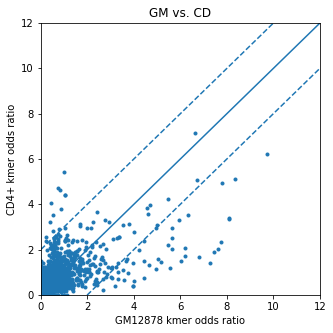

In [51]:
%pylab inline

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import math

# GTCAT 1.0243452741896227e-35  6.783443    0.002612    1175    75  _;***********
GM_kmer_list = "/storage/pandaman/project/AgentBind-GM12878-analysis/results/c/STAT3+GM12878/kmer_ranking.txt"

# TTCCG 3.2239774966083482e-27  7.146642    0.002659    805 54
CD_kmer_list = "/storage/pandaman/project/AgentBind-IMPACT/results-c40/c/Stat3/kmer_ranking.txt"

def read_from_kmer_list(path):
    kmer_dict = {}
    rank = 0
    for line in open(path):
        rank += 1
        elems = line.split("\t")
        kmer = elems[0]
        pval = float(elems[1])
        odds_ratio = float(elems[2])
        weight = float(elems[3])
        kmer_dict[kmer] = odds_ratio
    return kmer_dict

GM_kmer_dict = read_from_kmer_list(GM_kmer_list)
CD_kmer_dict = read_from_kmer_list(CD_kmer_list)

x_GM = []
y_CD = []
for kmer in GM_kmer_dict:
    if (GM_kmer_dict[kmer] >= 0) or (CD_kmer_dict[kmer] >= 0):
        x_GM.append(GM_kmer_dict[kmer])
        y_CD.append(CD_kmer_dict[kmer])

f_scatter = "./x_GM_vs_y_CD.png"

fig = plt.figure()
fig.set_size_inches((5, 5))
ax = fig.add_subplot(111)
ax.scatter(x_GM, y_CD, marker=".")
ax.set_title("GM vs. CD")
ax.set_xlabel('GM12878 kmer odds ratio')
ax.set_ylabel('CD4+ kmer odds ratio')
((xmin,xmax), (ymin,ymax)) = ((0, 12), (0, 12))
ax.add_line(matplotlib.lines.Line2D([xmin,xmax], [ymin,ymax]))
ax.add_line(matplotlib.lines.Line2D([xmin,xmax], [ymin-2,ymax-2], ls = "--"))
ax.add_line(matplotlib.lines.Line2D([xmin,xmax], [ymin+2,ymax+2], ls = "--"))
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
#plt.show()
#plt.savefig(f_scatter)
#plt.close()